# Projeto #1 - Análise Exploratória de Dados

Antes de começar, leia as [Instruções](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#instru%C3%A7%C3%B5es) e os [Critérios de Avaliação](https://github.com/thvmm/pos-ds-ia/tree/master/projeto_1#crit%C3%A9rios-de-avalia%C3%A7%C3%A3o)


### 1) **(5%)** Qual a base escolhida e qual seu interesse nela?

ENEM 2016 - Data from ENEM 2016, the Brazilian High School National Exam. 
Disponível em https://www.kaggle.com/gbonesso/enem-2016
Exploração de dados sobre resultados do ENEM (entrantes do ensino superior) pode auxiliar projetos de pesquisa em desenvolvimento no LATACI Research Institute, onde atuo.
O arquivo original possui mais de 8 milhões de linhas, e optei por gerar um com apenas 15 mil linhas para este projeto.
Optei por explorar o arquivo somente com comandos python, por exemplo mostrando as 166 colunas e fazendo a eliminação.
As questões que pretendo analisar:
1) Pessoas com algum tipo de deficiência apresentam notas inferiores?
2) Tipos de prova interferem na nota?
3) Sexo, idade ou região de residência interferem na nota?

In [81]:
import pandas as pd
import numpy as np
from maxpy import *
#import pandas_profiling
import seaborn as sn

#arquivo = create_subset("microdados_enem_2016.csv", 15000)

### 2) **(5%)** Descrição básica do conjunto de dados escolhido pelo aluno (1 parágrafo).
- O arquivo original possui 166 colunas. Para este projeto, serão selecionados o estado de residência; idade; sexo; se é treineiro ou não; os tipos (códigos) e as notas de Ciências da Natureza (CN), Ciências Humanas (CH), Linguagens e Códigos (LC), Matemática (MAT) e redação; se possui algum tipo de deficiência (dislexia, discalculia, baixa visão, cegueira, surdez, deficiência auditiva, surdo e cego, deficiência física, déficit de atenção, autismo, visão monocular, outra deficiência). Os tipos de deficiência seguem as colunas definidas no arquivo.
- Todas as variáveis selecionadas são discretas, exceto as notas.


In [82]:
#enem2016 = pd.read_csv(arquivo, encoding = "ISO-8859-1")
enem2016 = pd.read_csv("microdados_enem_2016_15000.csv", 
    sep=r'\s*,\s*',
    engine='python')

print(enem2016.info())
print(enem2016.count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 166 entries, NU_INSCRICAO to Q050
dtypes: float64(36), int64(75), object(55)
memory usage: 19.0+ MB
None
NU_INSCRICAO               15000
NU_ANO                     15000
CO_MUNICIPIO_RESIDENCIA    15000
NO_MUNICIPIO_RESIDENCIA    15000
CO_UF_RESIDENCIA           15000
SG_UF_RESIDENCIA           15000
NU_IDADE                   15000
TP_SEXO                    15000
TP_ESTADO_CIVIL            14271
TP_COR_RACA                15000
TP_NACIONALIDADE           15000
CO_MUNICIPIO_NASCIMENTO    14585
NO_MUNICIPIO_NASCIMENTO    14585
CO_UF_NASCIMENTO           14585
SG_UF_NASCIMENTO           14585
TP_ST_CONCLUSAO            15000
TP_ANO_CONCLUIU            15000
TP_ESCOLA                  15000
TP_ENSINO                   1244
IN_TREINEIRO               15000
CO_ESCOLA                   1244
CO_MUNICIPIO_ESC            1244
NO_MUNICIPIO_ESC            1244
CO_UF_ESC                   1244
SG_UF_ESC         

In [83]:
# Excluir colunas

colunas = ["NU_INSCRICAO", "NU_ANO", "CO_MUNICIPIO_RESIDENCIA", "NO_MUNICIPIO_RESIDENCIA", "TP_ESTADO_CIVIL", "TP_COR_RACA", "TP_NACIONALIDADE", "CO_MUNICIPIO_NASCIMENTO", "NO_MUNICIPIO_NASCIMENTO", "CO_UF_NASCIMENTO", "SG_UF_NASCIMENTO", "TP_ST_CONCLUSAO", "TP_ANO_CONCLUIU", "TP_ESCOLA", "TP_ENSINO", "CO_ESCOLA", "CO_MUNICIPIO_ESC", "NO_MUNICIPIO_ESC", "CO_UF_ESC", "SG_UF_ESC", "TP_DEPENDENCIA_ADM_ESC", "TP_LOCALIZACAO_ESC", "TP_SIT_FUNC_ESC", "IN_SABATISTA", "IN_GESTANTE", "IN_LACTANTE", "IN_IDOSO", "IN_ESTUDA_CLASSE_HOSPITALAR", "IN_SEM_RECURSO", "IN_BRAILLE", "IN_AMPLIADA_24", "IN_AMPLIADA_18", "IN_LEDOR", "IN_ACESSO", "IN_TRANSCRICAO", "IN_LIBRAS", "IN_LEITURA_LABIAL", "IN_MESA_CADEIRA_RODAS", "IN_MESA_CADEIRA_SEPARADA", "IN_APOIO_PERNA", "IN_GUIA_INTERPRETE", "IN_MACA", "IN_COMPUTADOR", "IN_CADEIRA_ESPECIAL", "IN_CADEIRA_CANHOTO", "IN_CADEIRA_ACOLCHOADA", "IN_PROVA_DEITADO", "IN_MOBILIARIO_OBESO", "IN_LAMINA_OVERLAY", "IN_PROTETOR_AURICULAR", "IN_MEDIDOR_GLICOSE", "IN_MAQUINA_BRAILE", "IN_SOROBAN", "IN_MARCA_PASSO", "IN_SONDA", "IN_MEDICAMENTOS", "IN_SALA_INDIVIDUAL", "IN_SALA_ESPECIAL", "IN_SALA_ACOMPANHANTE", "IN_MOBILIARIO_ESPECIFICO", "IN_MATERIAL_ESPECIFICO", "IN_NOME_SOCIAL", "IN_CERTIFICADO", "NO_ENTIDADE_CERTIFICACAO", "CO_UF_ENTIDADE_CERTIFICACAO", "SG_UF_ENTIDADE_CERTIFICACAO", "CO_MUNICIPIO_PROVA", "NO_MUNICIPIO_PROVA", "CO_UF_PROVA", "TP_PRESENCA_CN", "TP_PRESENCA_CH", "TP_PRESENCA_LC", "TP_PRESENCA_MT", "TX_RESPOSTAS_CN", "TX_RESPOSTAS_CH", "TX_RESPOSTAS_LC", "TX_RESPOSTAS_MT", "TP_LINGUA", "TX_GABARITO_CN", "TX_GABARITO_CH", "TX_GABARITO_LC", "TX_GABARITO_MT", "TP_STATUS_REDACAO", "NU_NOTA_COMP1", "NU_NOTA_COMP2", "NU_NOTA_COMP3", "NU_NOTA_COMP4", "NU_NOTA_COMP5", "Q001", "Q002", "Q003", "Q004", "Q005", "Q006", "Q007", "Q008", "Q009", "Q010", "Q011", "Q012", "Q013", "Q014", "Q015", "Q016", "Q017", "Q018", "Q019", "Q020", "Q021", "Q022", "Q023", "Q024", "Q025", "Q026", "Q027", "Q028", "Q029", "Q030", "Q031", "Q032", "Q033", "Q034", "Q035", "Q036", "Q037", "Q038", "Q039", "Q040", "Q041", "Q042", "Q043", "Q044", "Q045", "Q046", "Q047", "Q048", "Q049", "Q050"]
drop_columns(enem2016, colunas)

print(enem2016.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 28 columns):
CO_UF_RESIDENCIA           15000 non-null int64
SG_UF_RESIDENCIA           15000 non-null object
NU_IDADE                   15000 non-null int64
TP_SEXO                    15000 non-null object
IN_TREINEIRO               15000 non-null int64
IN_BAIXA_VISAO             15000 non-null int64
IN_CEGUEIRA                15000 non-null int64
IN_SURDEZ                  15000 non-null int64
IN_DEFICIENCIA_AUDITIVA    15000 non-null int64
IN_SURDO_CEGUEIRA          15000 non-null int64
IN_DEFICIENCIA_FISICA      15000 non-null int64
IN_DEFICIENCIA_MENTAL      15000 non-null int64
IN_DEFICIT_ATENCAO         15000 non-null int64
IN_DISLEXIA                15000 non-null int64
IN_DISCALCULIA             15000 non-null int64
IN_AUTISMO                 15000 non-null int64
IN_VISAO_MONOCULAR         15000 non-null int64
IN_OUTRA_DEF               15000 non-null int64
SG_UF_PROVA              

In [84]:
# Testar valores únicos de IN_DISLEXIA, IN_DISLEXIA, IN_BAIXA_VISAO, IN_CEGUEIRA, IN_SURDEZ, IN_DEFICIENCIA_AUDITIVA, IN_SURDO_CEGUEIRA, IN_DEFICIENCIA_FISICA, IN_DEFICIENCIA_MENTAL, IN_DEFICIT_ATENCAO, IN_AUTISMO, IN_VISAO_MONOCULAR, IN_OUTRA_DEF
unique_values(enem2016, 'IN_DISLEXIA')
unique_values(enem2016, 'IN_DISCALCULIA')
unique_values(enem2016, 'IN_BAIXA_VISAO')
unique_values(enem2016, 'IN_CEGUEIRA')
unique_values(enem2016, 'IN_SURDEZ')
unique_values(enem2016, 'IN_DEFICIENCIA_AUDITIVA')
unique_values(enem2016, 'IN_SURDO_CEGUEIRA')
unique_values(enem2016, 'IN_DEFICIENCIA_FISICA')
unique_values(enem2016, 'IN_DEFICIENCIA_MENTAL')
unique_values(enem2016, 'IN_DEFICIT_ATENCAO')
unique_values(enem2016, 'IN_AUTISMO')
unique_values(enem2016, 'IN_VISAO_MONOCULAR')
unique_values(enem2016, 'IN_OUTRA_DEF')


Valores distintos de IN_DISLEXIA [0 1]
0    0.999867
1    0.000133
dtype: float64 

Valores distintos de IN_DISCALCULIA [0 1]
0    0.999933
1    0.000067
dtype: float64 

Valores distintos de IN_BAIXA_VISAO [0 1]
0    0.999267
1    0.000733
dtype: float64 

Valores distintos de IN_CEGUEIRA [0 1]
0    0.999933
1    0.000067
dtype: float64 

Valores distintos de IN_SURDEZ [0 1]
0    0.999867
1    0.000133
dtype: float64 

Valores distintos de IN_DEFICIENCIA_AUDITIVA [0 1]
0    0.999133
1    0.000867
dtype: float64 

Valores distintos de IN_SURDO_CEGUEIRA [0 1]
0    0.999933
1    0.000067
dtype: float64 

Valores distintos de IN_DEFICIENCIA_FISICA [0 1]
0    0.996867
1    0.003133
dtype: float64 

Valores distintos de IN_DEFICIENCIA_MENTAL [0 1]
0    0.999867
1    0.000133
dtype: float64 

Valores distintos de IN_DEFICIT_ATENCAO [0 1]
0    0.999
1    0.001
dtype: float64 

Valores distintos de IN_AUTISMO [0 1]
0    0.999933
1    0.000067
dtype: float64 

Valores distintos de IN_VISAO_MONO

In [85]:
# Agrupar as colunas de outras deficiências em uma única coluna
enem2016['def'] = 'NaN'
for index, row in enem2016.iterrows():
    enem2016.loc[index,'def'] = bool(enem2016.loc[index, 'IN_DISCALCULIA']) or bool(enem2016.loc[index, 'IN_DISLEXIA']) or bool(enem2016.loc[index, 'IN_BAIXA_VISAO']) or bool(enem2016.loc[index, 'IN_CEGUEIRA']) or bool(enem2016.loc[index, 'IN_SURDEZ']) or bool(enem2016.loc[index, 'IN_DEFICIENCIA_AUDITIVA']) or bool(enem2016.loc[index, 'IN_SURDO_CEGUEIRA']) or bool(enem2016.loc[index, 'IN_DEFICIENCIA_FISICA']) or bool(enem2016.loc[index, 'IN_DEFICIENCIA_MENTAL']) or bool(enem2016.loc[index, 'IN_DEFICIT_ATENCAO']) or bool(enem2016.loc[index, 'IN_AUTISMO']) or bool(enem2016.loc[index, 'IN_VISAO_MONOCULAR']) or bool(enem2016.loc[index, 'IN_OUTRA_DEF'])

# Selecionar colunas
enem2016 = enem2016[['NU_IDADE', 'TP_SEXO', 'IN_TREINEIRO', 'SG_UF_RESIDENCIA', 'def', 'CO_PROVA_CN', 'NU_NOTA_CN', 'CO_PROVA_CH', 'NU_NOTA_CH', 'CO_PROVA_LC', 'NU_NOTA_LC', 'CO_PROVA_MT', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]

# Renomear colunas
enem2016.columns = ['idade', 'sexo', 'treineiro', 'uf_resid', 'def', 'cod_prova_cn', 'nota_cn', 'cod_prova_ch', 'nota_ch', 'cod_prova_lc', 'nota_lc', 'cod_prova_mat', 'nota_mat', 'nota_redacao']

print(enem2016.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
idade            15000 non-null int64
sexo             15000 non-null object
treineiro        15000 non-null int64
uf_resid         15000 non-null object
def              15000 non-null bool
cod_prova_cn     11128 non-null float64
nota_cn          11128 non-null float64
cod_prova_ch     11128 non-null float64
nota_ch          11128 non-null float64
cod_prova_lc     10856 non-null float64
nota_lc          10856 non-null float64
cod_prova_mat    10856 non-null float64
nota_mat         10856 non-null float64
nota_redacao     10856 non-null float64
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 1.5+ MB
None


*Descrição da base e suas variáveis*

### 3) **(15%)** Faça uma avaliação descritiva da sua base. Quantas linhas ela possui? Quais os tipos de dados? Quantas e quais features possuem?

Cada variável escolhida pelo aluno precisa passar por ao menos 1 pré-processamento. O pré-processamento pode ser (mas não está limitado a):
- Checagem se os valores estão dentro de um limite permitido ou razoável.
- Tratamento de valores ausentes por eliminação ou substituição.
- Conversão do tipo de dados.


In [86]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
# Calcular número de linhas e colunas
# Listar features e seu tipo de dados
print(enem2016.info())

# Existe consistência no número de linhas com valores não nulos de cod_prova_cn, nota_cn, cod_prova_ch e nota_ch, e de cod_prova_lc, nota_lc, cod_prova_mat, nota_mat e nota_redacao.
# A diferença do número de linhas aparentemente se justifica por desistência no segundo dia, pois as provas de CN e CH foram realizadas no dia 05/11/16, e as de LC, MAT e Redação no dia 06/11/2016, conforme veiculado em https://www.enem.vestibulandoweb.com.br/data-enem-2016.html
# As linhas sem todas as provas serão eliminadas no pré-processamento


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
idade            15000 non-null int64
sexo             15000 non-null object
treineiro        15000 non-null int64
uf_resid         15000 non-null object
def              15000 non-null bool
cod_prova_cn     11128 non-null float64
nota_cn          11128 non-null float64
cod_prova_ch     11128 non-null float64
nota_ch          11128 non-null float64
cod_prova_lc     10856 non-null float64
nota_lc          10856 non-null float64
cod_prova_mat    10856 non-null float64
nota_mat         10856 non-null float64
nota_redacao     10856 non-null float64
dtypes: bool(1), float64(9), int64(2), object(2)
memory usage: 1.5+ MB
None


In [87]:
# PRÉ-PROCESSAMENTO - ANÁLISE INICIAL

# eliminar registros com cod_prova nulos
enem2016 = enem2016.dropna(subset=['cod_prova_cn'])
enem2016 = enem2016.dropna(subset=['cod_prova_ch'])
enem2016 = enem2016.dropna(subset=['cod_prova_lc'])
enem2016 = enem2016.dropna(subset=['cod_prova_mat'])

unique_values(enem2016, 'idade')
bins = [0, 16, 20, np.inf]
labels = ["0-16", "17-20", "20+"]
enem2016["faixa_etaria"] = pd.cut(enem2016["idade"], bins, labels=labels)

unique_values(enem2016, 'sexo')

unique_values(enem2016, 'treineiro')

unique_values(enem2016, 'uf_resid')
agrupa_estados_regiao(enem2016, "uf_resid", "regiao_resid")
drop_columns(enem2016, ["uf_resid"])

unique_values(enem2016, 'def')

unique_values(enem2016, 'cod_prova_cn')
agrupa_notas(enem2016, "faixa_nota_cn", "nota_cn")

unique_values(enem2016, 'cod_prova_ch')
agrupa_notas(enem2016, "faixa_nota_ch", "nota_ch")

unique_values(enem2016, 'cod_prova_lc')
agrupa_notas(enem2016, "faixa_nota_lc", "nota_lc")

unique_values(enem2016, 'cod_prova_mat')
agrupa_notas(enem2016, "faixa_nota_mat", "nota_mat")

agrupa_notas(enem2016, "faixa_nota_redacao", "nota_redacao")

# Resumo
print(enem2016.info())
enem2016.head(5)

Valores distintos de idade [23 20 21 17 19 29 60 16 18 24 26 22 25 28 30 36 32 33 34 41 50 31 15 37
 27 42 64 35 39 45 40 38 44 47 43 46 59 13 49 52 55 51 57 62 53 58 48 56
 54 14 63 66 78 65 68 61 67]
18    0.153142
19    0.130222
17    0.096396
20    0.091682
21    0.071534
22    0.058133
23    0.045564
24    0.044640
16    0.037893
25    0.029390
26    0.025046
28    0.022643
27    0.022458
29    0.018392
30    0.015527
33    0.015250
32    0.013863
31    0.012847
34    0.009704
35    0.009335
36    0.008595
15    0.007763
37    0.006839
39    0.006285
38    0.006192
42    0.004713
41    0.004067
40    0.003882
44    0.003697
45    0.003512
43    0.003050
46    0.002126
50    0.001941
47    0.001756
49    0.001571
48    0.001201
54    0.001109
51    0.001109
14    0.001017
55    0.000832
53    0.000832
52    0.000739
57    0.000647
58    0.000555
62    0.000462
59    0.000370
56    0.000277
64    0.000185
63    0.000185
60    0.000185
78    0.000092
13    0.000092
66    0.000092
61 

idade sexo  treineiro    def  cod_prova_cn  nota_cn  cod_prova_ch  nota_ch  \
0     23    M          0  False         292.0    550.0         296.0    629.4   
1     20    M          0  False         294.0    576.6         298.0    669.8   
2     21    M          0  False         292.0    485.8         296.0    576.9   
3     17    M          0  False         294.0    571.4         298.0    628.6   
5     20    M          0  False         294.0    556.9         298.0    537.3   

   cod_prova_lc  nota_lc  cod_prova_mat  nota_mat  nota_redacao faixa_etaria  \
0         300.0    574.0          304.0     462.9         580.0          20+   
1         301.0    610.1          305.0     423.6         560.0        17-20   
2         299.0    637.4          303.0     414.6         480.0          20+   
3         299.0    646.2          303.0     709.4         620.0        17-20   
5         302.0    585.1          306.0     708.1         600.0        17-20   

  regiao_resid faixa_nota_cn faixa_nota_ch faixa_nota_lc faixa_nota_mat  \
0           NE       400-699       400-699       400-699        400-699   
1            S       400-699       400-699       400-699        400-699   
2           NE       400-699       400-699       400-699        400-699   
3            N       400-699       400-699       400-699           700+   
5           NE       400-699       400-699       400-699           700+   

  faixa_nota_redacao  
0            400-699  
1            400-699  
2            400-699  
3            400-699  
5            400-699

### 4) **(60%)** Nos blocos seguintes construa análises que vão justificar suas conclusões.

#### 4.1) **(20%)** Análise 1 -  Distribuição dos valores para cada uma das variáveis
- Exemplo para variável contínua: se o conjunto de dados possui a variável "idade". Quantos % possui a idade entre 0 e 30 anos? 31 a 59? 60+?

- Exemplo para variável discreta: se o conjunto de dados possui a variável "gênero", quantos % do conjunto de dados é do sexo feminino, quantos % é masculino? Inclua outros gêneros se houver.


Valores distintos de def [False  True]
False    0.993253
True     0.006747
dtype: float64 

None


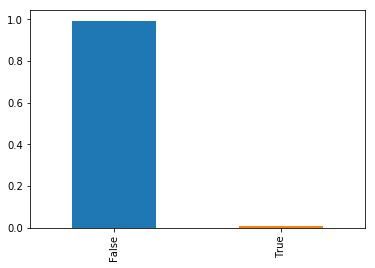

In [88]:
# 1) Pessoas com algum tipo de deficiência apresentam notas inferiores?
# Interessante: as médias de todas as notas das pessoas com algum tipo de deficiência foram maiores que daquelas sem deficiência
detalha_campo(enem2016, "def")


Valores distintos de faixa_nota_cn [400-699, 700+, 0-399]
Categories (3, object): [0-399 < 400-699 < 700+]
400-699    0.918115
0-399      0.066913
700+       0.014972
dtype: float64 

None


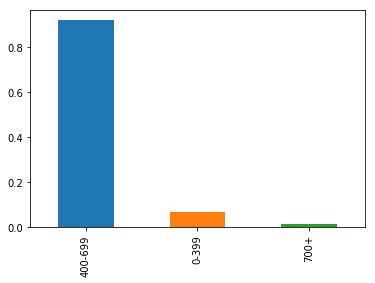

In [89]:
detalha_campo(enem2016, "faixa_nota_cn")


Valores distintos de faixa_nota_ch [400-699, 700+, 0-399, NaN]
Categories (3, object): [0-399 < 400-699 < 700+]
400-699    0.955726
700+       0.029578
0-399      0.014696
dtype: float64 

None


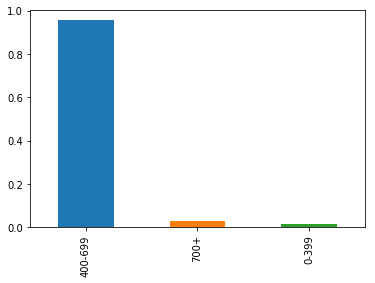

In [90]:
detalha_campo(enem2016, "faixa_nota_ch")


Valores distintos de faixa_nota_lc [400-699, 700+, 0-399, NaN]
Categories (3, object): [0-399 < 400-699 < 700+]
400-699    0.976976
0-399      0.019695
700+       0.003329
dtype: float64 

None


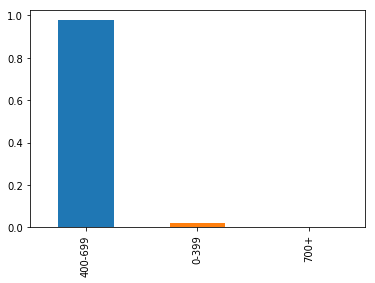

In [91]:
detalha_campo(enem2016, "faixa_nota_lc")


Valores distintos de faixa_nota_mat [400-699, 700+, 0-399, NaN]
Categories (3, object): [0-399 < 400-699 < 700+]
400-699    0.790900
0-399      0.124665
700+       0.084435
dtype: float64 

None


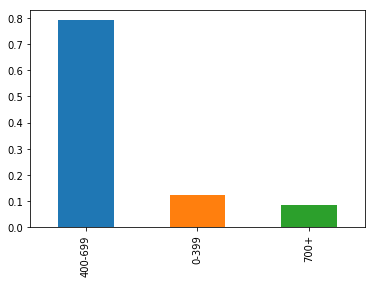

In [92]:
detalha_campo(enem2016, "faixa_nota_mat")


Valores distintos de faixa_nota_redacao [400-699, 700+, 0-399, NaN]
Categories (3, object): [0-399 < 400-699 < 700+]
400-699    0.708454
700+       0.238419
0-399      0.053127
dtype: float64 

None


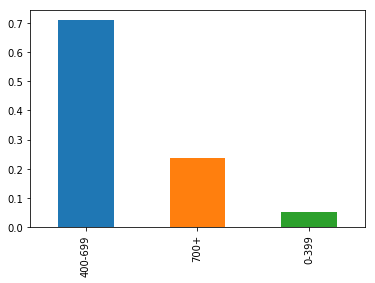

In [93]:
detalha_campo(enem2016, "faixa_nota_redacao")


Valores distintos de cod_prova_cn [292. 294. 291. 351. 293. 352. 353. 354. 334.]
291.0    0.273013
293.0    0.244362
292.0    0.229298
294.0    0.223105
352.0    0.008041
353.0    0.007948
351.0    0.007209
354.0    0.006932
334.0    0.000092
dtype: float64 

None


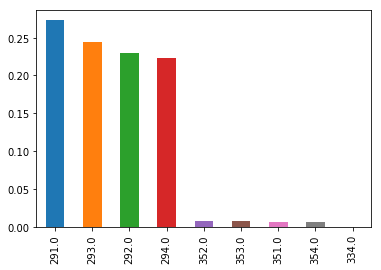

In [94]:
# 2) Tipos de prova interferem na nota?
# Os % por bloco de prova conferem (CN e CH / LC e MAT)
detalha_campo(enem2016, "cod_prova_cn")


Valores distintos de cod_prova_ch [296. 298. 295. 356. 297. 357. 358. 359. 339.]
295.0    0.273013
297.0    0.244362
296.0    0.229298
298.0    0.223105
357.0    0.008041
358.0    0.007948
356.0    0.007209
359.0    0.006932
339.0    0.000092
dtype: float64 

None


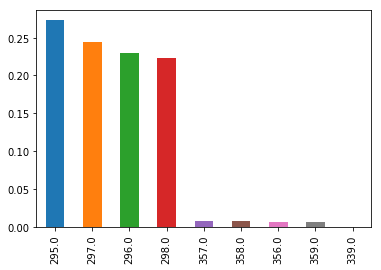

In [95]:
detalha_campo(enem2016, "cod_prova_ch")


Valores distintos de cod_prova_lc [300. 301. 299. 302. 364. 362. 363. 361.]
300.0    0.264695
299.0    0.244732
302.0    0.239464
301.0    0.220980
362.0    0.008226
364.0    0.007579
361.0    0.007486
363.0    0.006839
dtype: float64 

None


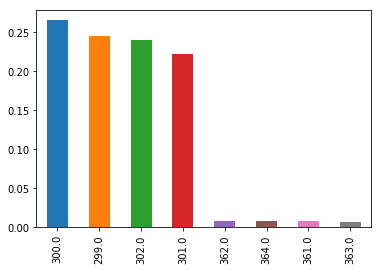

In [96]:
detalha_campo(enem2016, "cod_prova_lc")


Valores distintos de cod_prova_mat [304. 305. 303. 306. 369. 367. 368. 366.]
304.0    0.264695
303.0    0.244732
306.0    0.239464
305.0    0.220980
367.0    0.008226
369.0    0.007579
366.0    0.007486
368.0    0.006839
dtype: float64 

None


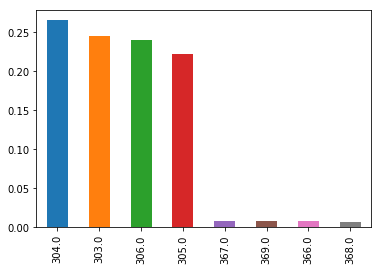

In [97]:
detalha_campo(enem2016, "cod_prova_mat")


Valores distintos de faixa_nota_cn [400-699, 700+, 0-399]
Categories (3, object): [0-399 < 400-699 < 700+]
400-699    0.918115
0-399      0.066913
700+       0.014972
dtype: float64 

None


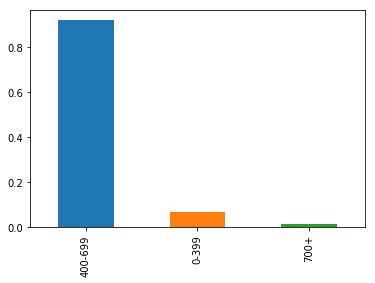

In [98]:
detalha_campo(enem2016, "faixa_nota_cn")


Valores distintos de faixa_nota_ch [400-699, 700+, 0-399, NaN]
Categories (3, object): [0-399 < 400-699 < 700+]
400-699    0.955726
700+       0.029578
0-399      0.014696
dtype: float64 

None


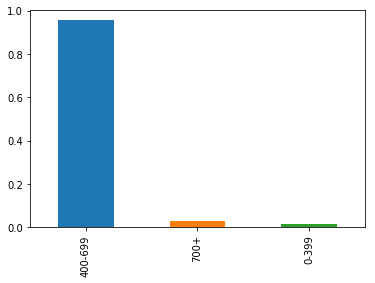

In [99]:
detalha_campo(enem2016, "faixa_nota_ch")


Valores distintos de faixa_nota_lc [400-699, 700+, 0-399, NaN]
Categories (3, object): [0-399 < 400-699 < 700+]
400-699    0.976976
0-399      0.019695
700+       0.003329
dtype: float64 

None


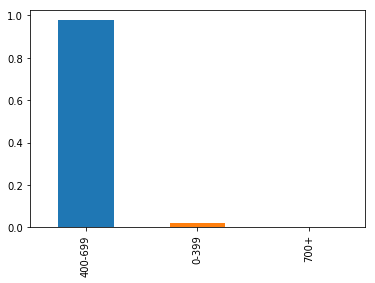

In [100]:
detalha_campo(enem2016, "faixa_nota_lc")


Valores distintos de faixa_nota_mat [400-699, 700+, 0-399, NaN]
Categories (3, object): [0-399 < 400-699 < 700+]
400-699    0.790900
0-399      0.124665
700+       0.084435
dtype: float64 

None


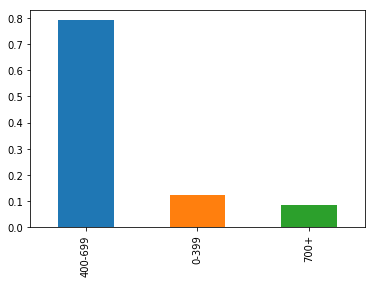

In [101]:
detalha_campo(enem2016, "faixa_nota_mat")


Valores distintos de faixa_nota_redacao [400-699, 700+, 0-399, NaN]
Categories (3, object): [0-399 < 400-699 < 700+]
400-699    0.708454
700+       0.238419
0-399      0.053127
dtype: float64 

None


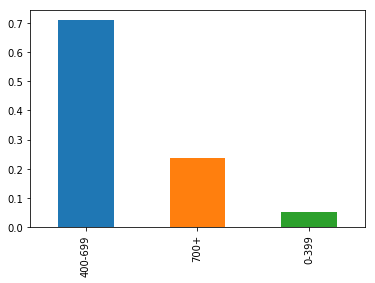

In [102]:
detalha_campo(enem2016, "faixa_nota_redacao")


Valores distintos de sexo ['M' 'F']
F    0.594362
M    0.405638
dtype: float64 

None


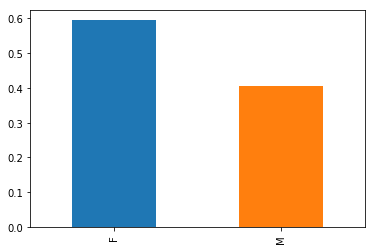

In [103]:
# 3) Sexo, idade ou região de residência interferem na nota?
detalha_campo(enem2016, "sexo")


Valores distintos de faixa_etaria [20+, 17-20, 0-16]
Categories (3, object): [0-16 < 17-20 < 20+]
20+      0.481793
17-20    0.471442
0-16     0.046765
dtype: float64 

None


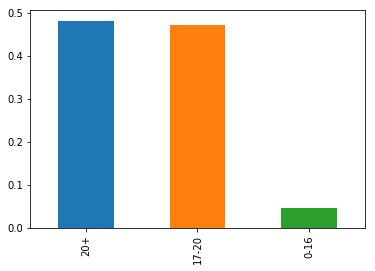

In [104]:
detalha_campo(enem2016, "faixa_etaria")


Valores distintos de regiao_resid ['NE' 'S' 'N' 'SE' 'CO']
SE    0.421996
NE    0.320887
S     0.123290
CO    0.071534
N     0.062292
dtype: float64 

None


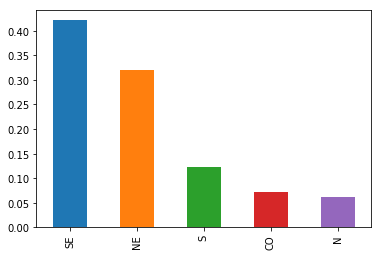

In [105]:
detalha_campo(enem2016, "regiao_resid")


Valores distintos de faixa_nota_cn [400-699, 700+, 0-399]
Categories (3, object): [0-399 < 400-699 < 700+]
400-699    0.918115
0-399      0.066913
700+       0.014972
dtype: float64 

None


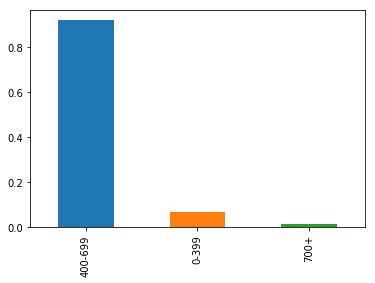

In [106]:
detalha_campo(enem2016, "faixa_nota_cn")


Valores distintos de faixa_nota_ch [400-699, 700+, 0-399, NaN]
Categories (3, object): [0-399 < 400-699 < 700+]
400-699    0.955726
700+       0.029578
0-399      0.014696
dtype: float64 

None


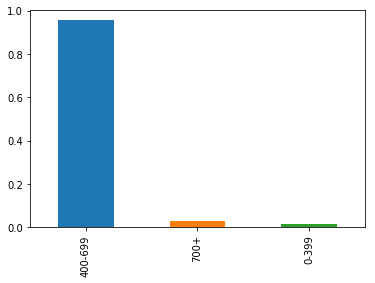

In [107]:
detalha_campo(enem2016, "faixa_nota_ch")


Valores distintos de faixa_nota_lc [400-699, 700+, 0-399, NaN]
Categories (3, object): [0-399 < 400-699 < 700+]
400-699    0.976976
0-399      0.019695
700+       0.003329
dtype: float64 

None


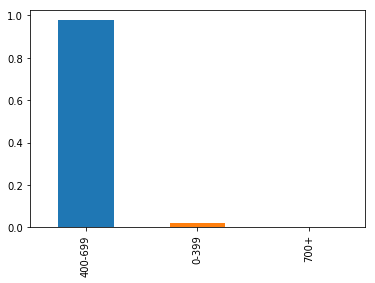

In [108]:
detalha_campo(enem2016, "faixa_nota_lc")


Valores distintos de faixa_nota_mat [400-699, 700+, 0-399, NaN]
Categories (3, object): [0-399 < 400-699 < 700+]
400-699    0.790900
0-399      0.124665
700+       0.084435
dtype: float64 

None


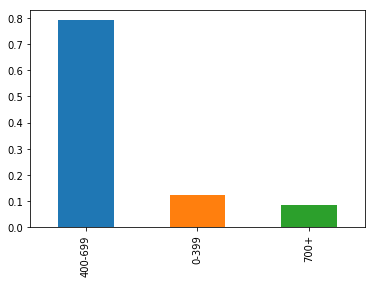

In [109]:
detalha_campo(enem2016, "faixa_nota_mat")


Valores distintos de faixa_nota_redacao [400-699, 700+, 0-399, NaN]
Categories (3, object): [0-399 < 400-699 < 700+]
400-699    0.708454
700+       0.238419
0-399      0.053127
dtype: float64 

None


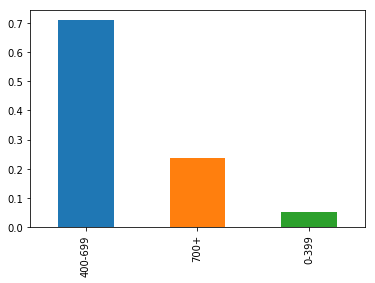

In [110]:
detalha_campo(enem2016, "faixa_nota_redacao")


#### 4.2) **(20%)** Análise 2 - Dependência entre variáveis
O aluno deve apresentar as mesmas distribuições para cada valor da variável dependente. Exemplo: Em um conjunto de dados em que as variáveis independentes são idade e sexo, e a variável dependente é renda. O aluno pode dividir a renda em 3 "grupos", <1000 reais, entre 1000 e 10000 reais e >1000 reais. Para cada um desses grupos, é necessário apresentar a distribuição das variáveis "idade" e "sexo".


In [111]:
# Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
# 1) Pessoas com algum tipo de deficiência apresentam notas inferiores?

enem2016_def = enem2016[enem2016["def"] == True]
enem2016_nodef = enem2016[enem2016["def"] == False]

print("Média nota_cn:", enem2016_def.nota_cn.mean(), "(def) - ", enem2016_nodef.nota_cn.mean(), "(nodef)")
print("Média nota_ch:", enem2016_def.nota_ch.mean(), "(def) - ", enem2016_nodef.nota_ch.mean(), "(nodef)")
print("Média nota_lc:", enem2016_def.nota_lc.mean(), "(def) - ", enem2016_nodef.nota_lc.mean(), "(nodef)")
print("Média nota_mat:", enem2016_def.nota_mat.mean(), "(def) - ", enem2016_nodef.nota_mat.mean(), "(nodef)")
print("Média nota_redacao:", enem2016_def.nota_redacao.mean(), "(def) - ", enem2016_nodef.nota_redacao.mean(), "(nodef)")

print("Média idade:", enem2016_def.idade.mean(), "(def) - ", enem2016_nodef.idade.mean(), "(nodef)")


Média nota_cn: 523.5301369863017 (def) -  505.6482088024562 (nodef)
Média nota_ch: 580.5958904109593 (def) -  568.2713315343802 (nodef)
Média nota_lc: 551.6342465753426 (def) -  548.6258304643188 (nodef)
Média nota_mat: 534.5424657534247 (def) -  521.5655438727073 (nodef)
Média nota_redacao: 620.972602739726 (def) -  592.4834837629106 (nodef)
Média idade: 24.876712328767123 (def) -  22.833721038429328 (nodef)


Valores distintos de faixa_nota_cn [400-699, 700+, 0-399]
Categories (3, object): [0-399 < 400-699 < 700+]
400-699    0.890411
700+       0.068493
0-399      0.041096
dtype: float64 

None
Valores distintos de faixa_nota_cn [400-699, 700+, 0-399]
Categories (3, object): [0-399 < 400-699 < 700+]
400-699    0.918303
0-399      0.067088
700+       0.014609
dtype: float64 

None


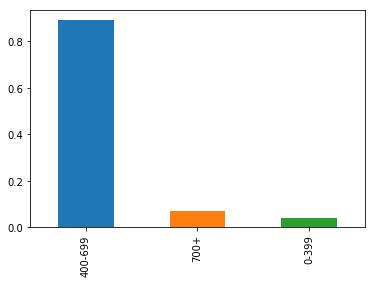

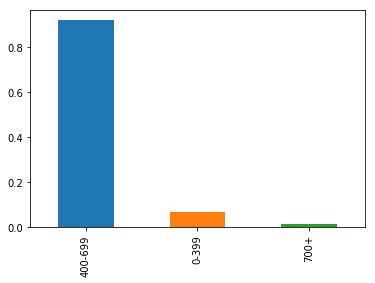

In [112]:
# Compara notas de pessoas com e sem deficiência
detalha_campo(enem2016_def, "faixa_nota_cn")
detalha_campo(enem2016_nodef, "faixa_nota_cn")


Valores distintos de faixa_nota_ch [400-699, 700+, 0-399]
Categories (3, object): [0-399 < 400-699 < 700+]
400-699    0.917808
700+       0.068493
0-399      0.013699
dtype: float64 

None
Valores distintos de faixa_nota_ch [400-699, 700+, 0-399, NaN]
Categories (3, object): [0-399 < 400-699 < 700+]
400-699    0.955984
700+       0.029313
0-399      0.014703
dtype: float64 

None


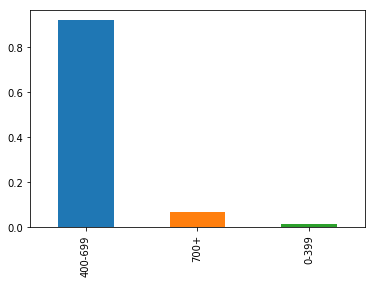

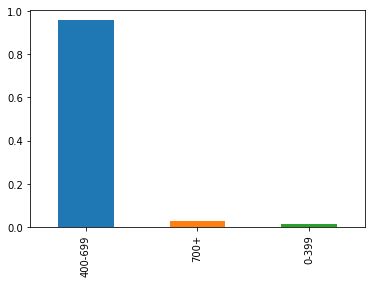

In [113]:
detalha_campo(enem2016_def, "faixa_nota_ch")
detalha_campo(enem2016_nodef, "faixa_nota_ch")


Valores distintos de faixa_nota_lc [400-699, 700+, 0-399]
Categories (3, object): [0-399 < 400-699 < 700+]
400-699    0.945205
700+       0.027397
0-399      0.027397
dtype: float64 

None
Valores distintos de faixa_nota_lc [400-699, 700+, 0-399, NaN]
Categories (3, object): [0-399 < 400-699 < 700+]
400-699    0.977192
0-399      0.019643
700+       0.003165
dtype: float64 

None


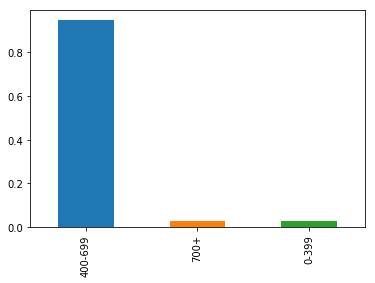

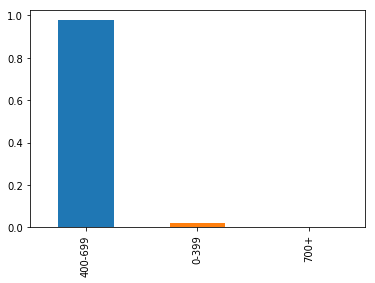

In [114]:
detalha_campo(enem2016_def, "faixa_nota_lc")
detalha_campo(enem2016_nodef, "faixa_nota_lc")


Valores distintos de faixa_nota_mat [700+, 400-699, 0-399]
Categories (3, object): [0-399 < 400-699 < 700+]
400-699    0.684932
0-399      0.164384
700+       0.150685
dtype: float64 

None
Valores distintos de faixa_nota_mat [400-699, 700+, 0-399, NaN]
Categories (3, object): [0-399 < 400-699 < 700+]
400-699    0.791620
0-399      0.124395
700+       0.083985
dtype: float64 

None


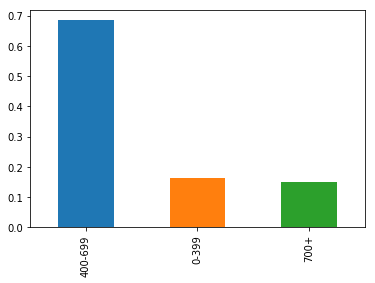

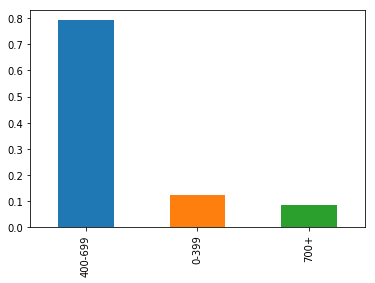

In [115]:
detalha_campo(enem2016_def, "faixa_nota_mat")
detalha_campo(enem2016_nodef, "faixa_nota_mat")


Valores distintos de faixa_nota_redacao [400-699, 700+, 0-399, NaN]
Categories (3, object): [0-399 < 400-699 < 700+]
400-699    0.625000
700+       0.319444
0-399      0.055556
dtype: float64 

None
Valores distintos de faixa_nota_redacao [400-699, 700+, 0-399, NaN]
Categories (3, object): [0-399 < 400-699 < 700+]
400-699    0.709018
700+       0.237872
0-399      0.053111
dtype: float64 

None


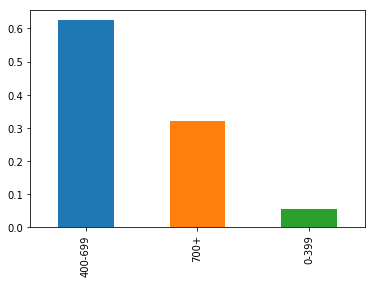

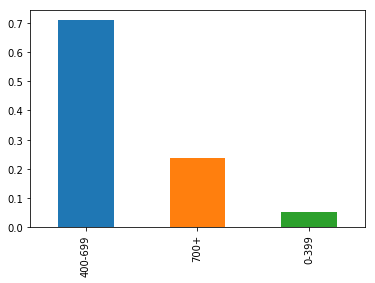

In [116]:
detalha_campo(enem2016_def, "faixa_nota_redacao")
detalha_campo(enem2016_nodef, "faixa_nota_redacao")


Valores distintos de cod_prova_cn [294. 293. 292. 351. 291. 354. 353.]
293.0    0.301370
291.0    0.287671
292.0    0.205479
294.0    0.150685
354.0    0.027397
353.0    0.013699
351.0    0.013699
dtype: float64 

None
Valores distintos de cod_prova_cn [292. 294. 291. 351. 293. 352. 353. 354. 334.]
291.0    0.272913
293.0    0.243975
292.0    0.229459
294.0    0.223597
352.0    0.008095
353.0    0.007909
351.0    0.007165
354.0    0.006793
334.0    0.000093
dtype: float64 

None


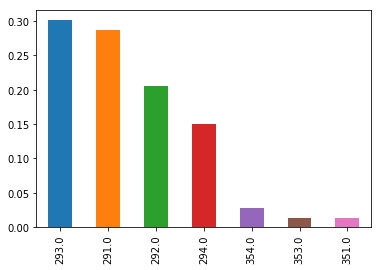

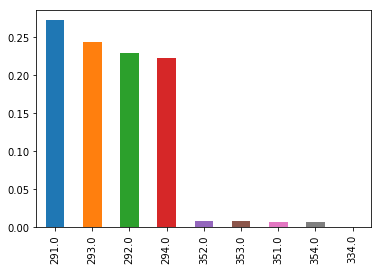

In [117]:
# Provas específicas foram usadas para pessoas com deficiência?
# Não foram, mas não é possível determinar porque alguns tipos de prova foram usados tão pouco
detalha_campo(enem2016_def, "cod_prova_cn")
detalha_campo(enem2016_nodef, "cod_prova_cn")


Valores distintos de cod_prova_ch [298. 297. 296. 356. 295. 359. 358.]
297.0    0.301370
295.0    0.287671
296.0    0.205479
298.0    0.150685
359.0    0.027397
358.0    0.013699
356.0    0.013699
dtype: float64 

None
Valores distintos de cod_prova_ch [296. 298. 295. 356. 297. 357. 358. 359. 339.]
295.0    0.272913
297.0    0.243975
296.0    0.229459
298.0    0.223597
357.0    0.008095
358.0    0.007909
356.0    0.007165
359.0    0.006793
339.0    0.000093
dtype: float64 

None


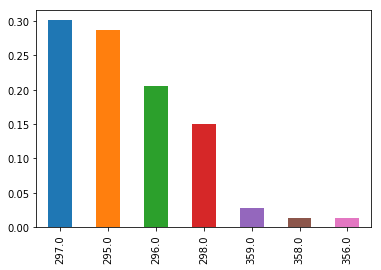

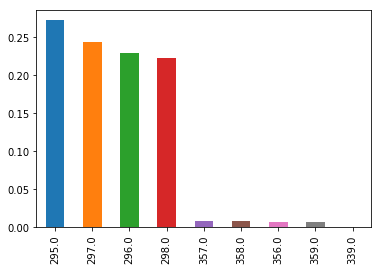

In [118]:
detalha_campo(enem2016_def, "cod_prova_ch")
detalha_campo(enem2016_nodef, "cod_prova_ch")


Valores distintos de cod_prova_lc [302. 362. 361. 301. 300. 299.]
302.0    0.356164
300.0    0.232877
301.0    0.191781
299.0    0.164384
361.0    0.027397
362.0    0.027397
dtype: float64 

None
Valores distintos de cod_prova_lc [300. 301. 299. 302. 364. 362. 363. 361.]
300.0    0.264911
299.0    0.245278
302.0    0.238671
301.0    0.221178
362.0    0.008095
364.0    0.007630
361.0    0.007351
363.0    0.006886
dtype: float64 

None


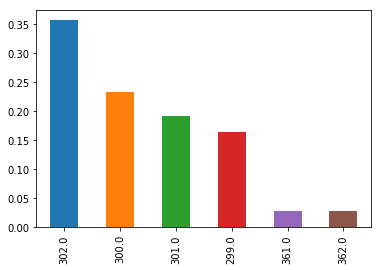

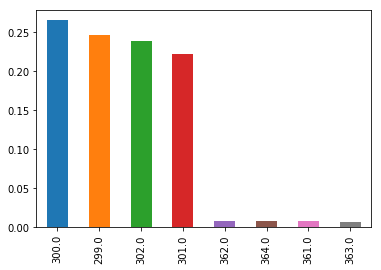

In [119]:
detalha_campo(enem2016_def, "cod_prova_lc")
detalha_campo(enem2016_nodef, "cod_prova_lc")


Valores distintos de cod_prova_mat [306. 367. 366. 305. 304. 303.]
306.0    0.356164
304.0    0.232877
305.0    0.191781
303.0    0.164384
366.0    0.027397
367.0    0.027397
dtype: float64 

None
Valores distintos de cod_prova_mat [304. 305. 303. 306. 369. 367. 368. 366.]
304.0    0.264911
303.0    0.245278
306.0    0.238671
305.0    0.221178
367.0    0.008095
369.0    0.007630
366.0    0.007351
368.0    0.006886
dtype: float64 

None


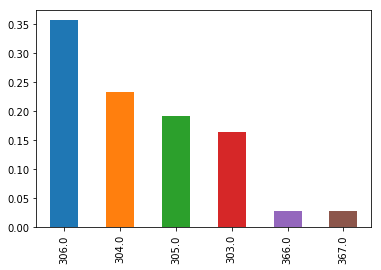

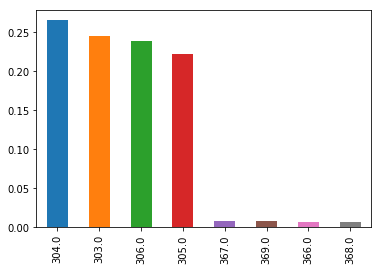

In [120]:
detalha_campo(enem2016_def, "cod_prova_mat")
detalha_campo(enem2016_nodef, "cod_prova_mat")


In [121]:
# 2) Tipos de prova interferem na nota?
#print("Média idade:", enem2016_def.idade.mean(), "(def) - ", enem2016_nodef.idade.mean(), "(nodef)")

In [122]:
# 3) Sexo, idade ou região de residência interferem na nota?

enem2016_masc = enem2016[enem2016["sexo"] == "M"]
enem2016_fem = enem2016[enem2016["sexo"] == "F"]

enem2016_0_16 = enem2016[enem2016["faixa_etaria"] == "0-16"]
enem2016_17_20 = enem2016[enem2016["faixa_etaria"] == "17-20"]
enem2016_21_ = enem2016[enem2016["faixa_etaria"] == "20+"]

enem2016_n = enem2016[enem2016["regiao_resid"] == "N"]
enem2016_ne = enem2016[enem2016["regiao_resid"] == "NE"]
enem2016_co = enem2016[enem2016["regiao_resid"] == "CO"]
enem2016_se = enem2016[enem2016["regiao_resid"] == "SE"]
enem2016_s = enem2016[enem2016["regiao_resid"] == "S"]


In [123]:
# sexo
# Médias de homens superiores para CN, CH, MAT / LC igual / Redação com média superior das mulheres
print("Média nota_cn:", enem2016_masc.nota_cn.mean(), "(masc) - ", enem2016_fem.nota_cn.mean(), "(fem)")
print("Média nota_ch:", enem2016_masc.nota_ch.mean(), "(masc) - ", enem2016_fem.nota_ch.mean(), "(fem)")
print("Média nota_lc:", enem2016_masc.nota_lc.mean(), "(masc) - ", enem2016_fem.nota_lc.mean(), "(fem)")
print("Média nota_mat:", enem2016_masc.nota_mat.mean(), "(masc) - ", enem2016_fem.nota_mat.mean(), "(fem)")
print("Média nota_redacao:", enem2016_masc.nota_redacao.mean(), "(masc) - ", enem2016_fem.nota_redacao.mean(), "(fem)")

Média nota_cn: 517.8155388471162 (masc) -  497.54728658062584 (fem)
Média nota_ch: 578.858714969241 (masc) -  561.1856009951799 (fem)
Média nota_lc: 548.47666894509 (masc) -  548.761778883533 (fem)
Média nota_mat: 546.8246981089083 (masc) -  504.4740942310681 (fem)
Média nota_redacao: 579.9131920710868 (masc) -  601.3857875913544 (fem)


In [124]:
# idade
# Todas as médias de pessoas entre 17 e 20 (mais preparadas, a princípio) são maiores
print("Média nota_cn:", enem2016_0_16.nota_cn.mean(), "(0-16) - ", enem2016_17_20.nota_cn.mean(), "(17-20)", enem2016_21_.nota_cn.mean(), "(20+)")
print("Média nota_ch:", enem2016_0_16.nota_ch.mean(), "(0-16) - ", enem2016_17_20.nota_ch.mean(), "(17-20)", enem2016_21_.nota_ch.mean(), "(20+)")
print("Média nota_lc:", enem2016_0_16.nota_lc.mean(), "(0-16) - ", enem2016_17_20.nota_lc.mean(), "(17-20)", enem2016_21_.nota_lc.mean(), "(20+)")
print("Média nota_mat:", enem2016_0_16.nota_mat.mean(), "(0-16) - ", enem2016_17_20.nota_mat.mean(), "(17-20)", enem2016_21_.nota_mat.mean(), "(20+)")
print("Média nota_redacao:", enem2016_0_16.nota_redacao.mean(), "(0-16) - ", enem2016_17_20.nota_redacao.mean(), "(17-20)", enem2016_21_.nota_redacao.mean(), "(20+)")


Média nota_cn: 505.4365612648221 (0-16) -  515.7163693393433 (17-20) 496.0673124880109 (20+)
Média nota_ch: 564.5865612648216 (0-16) -  572.7006861399727 (17-20) 564.4673892192574 (20+)
Média nota_lc: 548.71581027668 (0-16) -  553.8124681434999 (17-20) 543.5840207174384 (20+)
Média nota_mat: 519.9735177865615 (0-16) -  531.8007841599687 (17-20) 511.8864569345856 (20+)
Média nota_redacao: 592.8063241106719 (0-16) -  621.8553224857872 (17-20) 564.1103011701515 (20+)


In [125]:
# região residência
# A média da região SE em todas as notas é maior; da região N é a menor em todas
print("Média nota_cn:", enem2016_n.nota_cn.mean(), "(N) - ", enem2016_ne.nota_cn.mean(), "(NE)", enem2016_co.nota_cn.mean(), "(CO)", enem2016_se.nota_cn.mean(), "(SE)", enem2016_s.nota_cn.mean(), "(S)")
print("Média nota_ch:", enem2016_n.nota_ch.mean(), "(N) - ", enem2016_ne.nota_ch.mean(), "(NE)", enem2016_co.nota_ch.mean(), "(CO)", enem2016_se.nota_ch.mean(), "(SE)", enem2016_s.nota_ch.mean(), "(S)")
print("Média nota_lc:", enem2016_n.nota_lc.mean(), "(N) - ", enem2016_ne.nota_lc.mean(), "(NE)", enem2016_co.nota_lc.mean(), "(CO)", enem2016_se.nota_lc.mean(), "(SE)", enem2016_s.nota_lc.mean(), "(S)")
print("Média nota_mat:", enem2016_n.nota_mat.mean(), "(N) - ", enem2016_ne.nota_mat.mean(), "(NE)", enem2016_co.nota_mat.mean(), "(CO)", enem2016_se.nota_mat.mean(), "(SE)", enem2016_s.nota_mat.mean(), "(S)")
print("Média nota_redacao:", enem2016_n.nota_redacao.mean(), "(N) - ", enem2016_ne.nota_redacao.mean(), "(NE)", enem2016_co.nota_redacao.mean(), "(CO)", enem2016_se.nota_redacao.mean(), "(SE)", enem2016_s.nota_redacao.mean(), "(S)")

Média nota_cn: 492.2673590504441 (N) -  503.37433755760264 (NE) 503.4670542635656 (CO) 511.22332457292885 (SE) 501.4886806596695 (S)
Média nota_ch: 557.57121661721 (N) -  562.6965149769588 (NE) 564.9780361757105 (CO) 575.12768287341 (SE) 567.3044977511252 (S)
Média nota_lc: 534.7864985163206 (N) -  539.7922811059902 (NE) 545.9558139534885 (CO) 557.6556723609269 (SE) 549.4157421289353 (S)
Média nota_mat: 497.53709198813084 (N) -  511.8019009216591 (NE) 517.8023255813953 (CO) 532.5292159439335 (SE) 524.4849325337336 (S)
Média nota_redacao: 574.213649851632 (N) -  596.6540898617511 (NE) 587.2868217054264 (CO) 597.5891371003066 (SE) 577.9580209895053 (S)


#### 4.3) **(20%)** Análise 3 - Correlação entre variáveis

O aluno deve apresentar 3 análises de correlação entre variáveis do conjunto de dados trabalhado. Exemplo: Em um conjunto de dados com as informações de temperatura e ocorrência de incêndios, eu gostaria de saber a incidência de correlação entre as duas variáveis.



0.018263263063699738
0.014004115366568861
0.003721256797672319
0.009257050579942971
0.015598726817847488


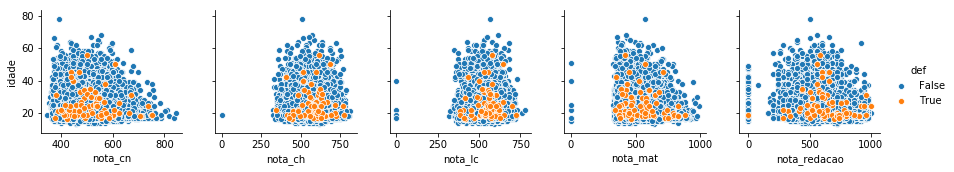

In [126]:
# Primeiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
# 1) Pessoas com algum tipo de deficiência apresentam notas inferiores?
correlacao(enem2016, "def", "nota_cn")
correlacao(enem2016, "def", "nota_ch")
correlacao(enem2016, "def", "nota_lc")
correlacao(enem2016, "def", "nota_mat")
correlacao(enem2016, "def", "nota_redacao")

sn.pairplot(enem2016, 
	             x_vars=["nota_cn", "nota_ch", "nota_lc", "nota_mat", "nota_redacao"], 
	             y_vars=["idade"],
	             hue = "def"
	             )

In [127]:
# 2) Tipos de prova interferem na nota?
# Não existe correlação entre o tipo de prova e as notas.
correlacao(enem2016, "cod_prova_cn", "nota_cn")
correlacao(enem2016, "cod_prova_ch", "nota_ch")
correlacao(enem2016, "cod_prova_lc", "nota_lc")
correlacao(enem2016, "cod_prova_mat", "nota_mat")


0.0007263181863519428
0.01970762847499031
-0.027263363646744098
0.011955258542098597


In [128]:
# Terceiro par de variáveis: Implemente sua análise aqui. Use mais blocos se achar que ficará mais organizado.
# 3) Sexo, idade ou região de residência interferem na nota?# Independentes: idade e sexo
# Correlação positiva para CN, CH, MAT / negativa para redação

enem2016["sexo_masc"] = 1
for index, row in enem2016.iterrows():
    if enem2016.loc[index, "sexo"] == "F":
        enem2016.loc[index, "sexo_masc"] = 0

correlacao(enem2016, "sexo_masc", "nota_cn")
correlacao(enem2016, "sexo_masc", "nota_ch")
correlacao(enem2016, "sexo_masc", "nota_lc")
correlacao(enem2016, "sexo_masc", "nota_mat")
correlacao(enem2016, "sexo_masc", "nota_redacao")



0.12416446458373055
0.12045209692334116
-0.002115344386002938
0.181208074025639
-0.07051989669715356


In [129]:
# idade
# Correlação negativa para a prova de redaçÃo (alkunos mais novos com preparo mais direcionado)
correlacao(enem2016, "idade", "nota_cn")
correlacao(enem2016, "idade", "nota_ch")
correlacao(enem2016, "idade", "nota_lc")
correlacao(enem2016, "idade", "nota_mat")
correlacao(enem2016, "idade", "nota_redacao")


-0.09929147911112857
-0.028270343349033333
-0.0719183320111818
-0.09266951430370131
-0.18737105520132516


In [130]:
# regiao residencia
# Não apresenta correlação significativa

enem2016["cod_regiao_resid"] = 'NaN'
for index, row in enem2016.iterrows():
    if enem2016.loc[index, "regiao_resid"] == "S":
        enem2016.loc[index, "cod_regiao_resid"] = 1
    elif enem2016.loc[index, "regiao_resid"] in "CO":
        enem2016.loc[index, "cod_regiao_resid"] = 2
    elif enem2016.loc[index, "regiao_resid"] in "SE":
        enem2016.loc[index, "cod_regiao_resid"] = 3
    elif enem2016.loc[index, "regiao_resid"] in "N":
        enem2016.loc[index, "cod_regiao_resid"] = 4
    else:
        enem2016.loc[index, "cod_regiao_resid"] = 5

correlacao(enem2016, "cod_regiao_resid", "nota_cn")
correlacao(enem2016, "cod_regiao_resid", "nota_ch")
correlacao(enem2016, "cod_regiao_resid", "nota_lc")
correlacao(enem2016, "cod_regiao_resid", "nota_mat")
correlacao(enem2016, "cod_regiao_resid", "nota_redacao")

-0.01088267355155303
-0.0397662886546245
-0.07448853056769501
-0.05414817656551735
0.027302494097996063


### 5) Conclusões **15%**

*O que é possível concluir com os dados que você analisou? Se fosse fazer uma apresentação, o que levaria como os maiores destaques e por que?*

In [131]:
''' 
1) Pessoas com algum tipo de deficiência apresentam notas inferiores?

- As médias de todas as notas (CN, CH, LC, MAT, REDACAO) das pessoas com algum tipo de deficiência foram maiores que daquelas sem deficiência.
- Também as notas acima de 700 foram proporcionalmente maiores (def X nodef): 
    CN: 6,85% / 1,46% (6,85% das pessoas com deficiência tiveram nota CN > 700)
    CH: 6,85% / 2,93%
    LC: 2,74% / 0,32%
    MAT: 15,07% / 8,40%
    REDACAO: 31,94% / 23,78%
- O número de pessoas com deficiência é muito baixo (0,67%).
- Não houve aplicação de prova específica para deficientes.

2) Tipos de prova interferem na nota?

- Não houve comprovação dessa interferência.
- Alguns tipos de prova foram usados pouco. Os dados não permitem uma análise mais precisa de porque esse número foi baixo.

3) Sexo, idade ou região de residência interferem na nota?

3.1) Sexo

- Médias de notas de homens foram superiores para CN, CH e MAT. LC foi praticamente igual. Nota de redação teve média superior das mulheres.
- Correlação positiva para CN (0.124), CH (0.1204) e MAT (0.1812) e negativa para REDACAO (-0.0705) 

3.2) Idade

- Alunos entre 17 e 20 anos tiveram as maiores médias em todas as notas. Explica-se por ser a idade em que são mais "preparados" para o exame, principalmente em relação à redação (correlação -0.1874).

3.3) Região de residência

- As médias das notas de todas as provas foram maiores para residentes da região Sudeste, e menores para residentes da região Norte.
'''





' \n1) Pessoas com algum tipo de deficiência apresentam notas inferiores?\n\n- As médias de todas as notas (CN, CH, LC, MAT, REDACAO) das pessoas com algum tipo de deficiência foram maiores que daquelas sem deficiência.\n- Também as notas acima de 700 foram proporcionalmente maiores (def X nodef): \n    CN: 6,85% / 1,46% (6,85% das pessoas com deficiência tiveram nota CN > 700)\n    CH: 6,85% / 2,93%\n    LC: 2,74% / 0,32%\n    MAT: 15,07% / 8,40%\n    REDACAO: 31,94% / 23,78%\n- O número de pessoas com deficiência é muito baixo (0,67%).\n- Não houve aplicação de prova específica para deficientes.\n\n2) Tipos de prova interferem na nota?\n\n- Não houve comprovação dessa interferência.\n- Alguns tipos de prova foram usados pouco, mas não foram aplicadas para pessoas com alguma deficiência. Os dados não permitem uma análise mais precisa de porque esse número foi baixo.\n\n3) Sexo, idade ou região de residência interferem na nota?\n\n3.1) Sexo\n\n- Médias de notas de homens foram superior